In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, data, model):
    if data == 35:
        df = df[(df['Model'] == model) & (df['Data in k'] == 35)].iloc[0,2::2]
    if data == 70:
        df = df[(df['Model'] == model) & (df['Data in k'] == 70)].iloc[0,3::2]
    return df.to_numpy().astype(float)

# Load validation histories
brain_df = pd.read_excel('./data/val_hist_brain.xlsx')

data = 70
brain70_unt_008M = df2np(brain_df, data, 'U-Net-8M')
brain70_unt_124M = df2np(brain_df, data, 'U-Net-124M')
brain70_unt_124M[-2:] = brain70_unt_124M[1] # big Unet overfits

brain70_vit_008M = df2np(brain_df, data, 'ViT-8M/10')
brain70_vit_060M = df2np(brain_df, data, 'ViT-60M/10')



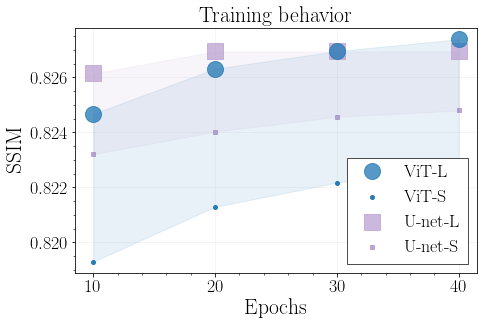

In [3]:
fig, ax = plt.subplots()
""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

""" brain """
# 70k data
grad_steps_70k = np.array([10, 20, 30, 40]) # every 10 epochs starting from 5
color1 = '#5ab085'
alpha = 0.1
ax.plot(grad_steps_70k, brain70_vit_060M, vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, zorder=6)
ax.plot(grad_steps_70k, brain70_vit_008M, vits.marker, markersize=vits.ms, alpha=vits.oc, color=vits.color, zorder=4)
ax.plot(grad_steps_70k, brain70_unt_124M, untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, zorder=3)
ax.plot(grad_steps_70k, brain70_unt_008M, unts.marker, markersize=unts.ms, alpha=unts.oc, color=unts.color, zorder=1)

ax.fill_between(grad_steps_70k, brain70_vit_060M, brain70_vit_008M, alpha=alpha, color=vitl.color)
ax.fill_between(grad_steps_70k, brain70_unt_124M, brain70_unt_008M, alpha=alpha, color=untl.color)

ax.set_title('Training behavior')
ax.set_xticks([10, 20, 30, 40])
ax.set_xticklabels(['10', '20', '30', '40'])

# Legend
ax.plot([], [], vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label = vitl.label, zorder=5)
ax.plot([], [], vits.marker, markersize=vits.ms, alpha=vits.oc, color=vitl.color, label = vits.label, zorder=4)
ax.plot([], [], untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label = untl.label, zorder=3)
ax.plot([], [], unts.marker, markersize=unts.ms, alpha=unts.oc, color=untl.color, label = unts.label, zorder=1)

ax.legend(loc='lower right')

ax.set_xlabel('Epochs')
ax.set_ylabel('SSIM')

fig.savefig('./plots/training_study_brain.pdf')